In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import seaborn as sns

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


In [74]:
# Grab and process the raw data.
data_path = ("known_offenses_nyc2013.csv")


In [75]:
data_raw = pd.read_csv(data_path)

In [76]:
data_raw

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000,nan


In [77]:
data_raw.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [78]:
# Need to drop the rape columns
data_raw.drop(columns=['Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2'])

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,12,18,405,99,291,15,0.000,nan


In [79]:
# rename like sms_raw.columns = ['review', 'good_rating']
data_raw.rename(index=str, columns={"City": "city", "Population": "population", "Murder and\rnonnegligent\rmanslaughter": 'murder', "Robbery": "robbery"})

,city,population,Violent crime,murder,Rape (revised definition)1,Rape (legacy definition)2,robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000,nan


In [80]:
data_raw.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [81]:
data_raw.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan


In [82]:
# Create a new df with variables city, population, murder, robbery
# data.iloc[:, 0:2] # first two columns of data frame with all rows
mv_data = data_raw.iloc[:,0:7]

In [83]:
data_raw.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3', 'Unnamed: 13'],
      dtype='object')

In [84]:
mv_data.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery'],
      dtype='object')

In [85]:
mv_data

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


In [86]:
mv_data.drop(columns=['Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2'])

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery
0,Adams Village,"1,861",0,0.000,0
1,Addison Town and Village,"2,577",3,0.000,0
2,Akron Village,"2,846",3,0.000,0
3,Albany,"97,956",791,8.000,227
4,Albion Village,"6,388",23,0.000,4
5,Alfred Village,"4,089",5,0.000,3
6,Allegany Village,"1,781",3,0.000,0
7,Amherst Town,"118,296",107,1.000,31
8,Amityville Village,"9,519",9,0.000,4
9,Amsterdam,"18,182",30,0.000,12


In [87]:
mv_data.drop(columns=['Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2'])


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Robbery
0,Adams Village,"1,861",0,0.000,0
1,Addison Town and Village,"2,577",3,0.000,0
2,Akron Village,"2,846",3,0.000,0
3,Albany,"97,956",791,8.000,227
4,Albion Village,"6,388",23,0.000,4
5,Alfred Village,"4,089",5,0.000,3
6,Allegany Village,"1,781",3,0.000,0
7,Amherst Town,"118,296",107,1.000,31
8,Amityville Village,"9,519",9,0.000,4
9,Amsterdam,"18,182",30,0.000,12


In [88]:
mv_data.drop(columns=['Violent\rcrime'])

,City,Population,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0.000,nan,0,0
1,Addison Town and Village,"2,577",0.000,nan,0,0
2,Akron Village,"2,846",0.000,nan,0,0
3,Albany,"97,956",8.000,nan,30,227
4,Albion Village,"6,388",0.000,nan,3,4
5,Alfred Village,"4,089",0.000,nan,0,3
6,Allegany Village,"1,781",0.000,nan,0,0
7,Amherst Town,"118,296",1.000,nan,7,31
8,Amityville Village,"9,519",0.000,nan,2,4
9,Amsterdam,"18,182",0.000,nan,0,12


# Question: the Rape values are back- but I dropped them, so this is a view, right?

In [89]:
mv_data.rename(index=str, columns={"Murder and\rnonnegligent\rmanslaughter": "Murder"})

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


In [90]:
# And now, the murder and rape columns are back and identical
mv_data

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


In [91]:
# a = '1,000,000'
# int(a.replace(',', ''))
# (int(mv_data['Population'][0].replace(',','')))**2
square_it = (int(mv_data['Population'][5].replace(',','')))**2
print(type(square_it))
print("The sixth element: ", square_it)

<class 'int'>
The sixth element:  16719921


In [92]:
# new_time = dfs['XYF']['TimeUS'].astype(float)
pd.to_numeric(mv_data['Population'].replace(',',''),errors='ignore')

0        1,861
1        2,577
2        2,846
3       97,956
4        6,388
5        4,089
6        1,781
7      118,296
8        9,519
9       18,182
10       2,053
11       4,523
12         658
13       2,522
14      27,270
15       3,333
16       7,473
17       5,418
18      15,374
19       5,733
20      17,627
21      34,243
22      46,304
23       1,410
24      12,001
25       1,022
26       2,325
27       2,054
28       2,065
29       2,358
        ...   
321     61,686
322     27,980
323      6,887
324     27,940
325      3,012
326      3,453
327      5,828
328      8,392
329      5,175
330     28,179
331     10,245
332      1,862
333      4,337
334     43,777
335      1,797
336      4,574
337      1,732
338     44,821
339      2,604
340     57,559
341      3,733
342      9,141
343     10,685
344        829
345      5,931
346    199,134
347     36,643
348        NaN
349        NaN
350        NaN
Name: Population, Length: 351, dtype: object

>>> import pandas as pd
>>> s = pd.Series(['1.0', '2', -3])
>>> pd.to_numeric(s)
>>> s = pd.Series(['apple', '1.0', '2', -3])
>>> pd.to_numeric(s, errors='ignore')
>>> pd.to_numeric(s, errors='coerce')

In [93]:
mv_data.dtypes

City                                       object
Population                                 object
Violent\rcrime                             object
Murder and\rnonnegligent\rmanslaughter    float64
Rape\r(revised\rdefinition)1              float64
Rape\r(legacy\rdefinition)2                object
Robbery                                    object
dtype: object

In [94]:
type(mv_data['Robbery'])

pandas.core.series.Series

In [95]:
# Clean up null values
mv_data[mv_data.isnull().any(axis=1)]

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


In [96]:
# Drops the Rape1 column, full of NaN values
mv_data.dropna(axis=1, how='all')

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,0,0
1,Addison Town and Village,"2,577",3,0.000,0,0
2,Akron Village,"2,846",3,0.000,0,0
3,Albany,"97,956",791,8.000,30,227
4,Albion Village,"6,388",23,0.000,3,4
5,Alfred Village,"4,089",5,0.000,0,3
6,Allegany Village,"1,781",3,0.000,0,0
7,Amherst Town,"118,296",107,1.000,7,31
8,Amityville Village,"9,519",9,0.000,2,4
9,Amsterdam,"18,182",30,0.000,0,12


In [97]:
# Get rid of any row w/ more than two NaN values
mv_data.dropna(thresh=2)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


- df.a[df.a < 10] = 3
- df.a[df.a == 10] = 2
- df.a[df.a > 10] = 1

In [98]:
# Force to copy .copy()
mv_data.rename(index=str, columns={"Murder and\rnonnegligent\rmanslaughter": "Murder"}).copy()

,City,Population,Violent crime,Murder,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


In [99]:
pd.to_numeric(mv_data['Population'].replace(',',''),errors='ignore')

0        1,861
1        2,577
2        2,846
3       97,956
4        6,388
5        4,089
6        1,781
7      118,296
8        9,519
9       18,182
10       2,053
11       4,523
12         658
13       2,522
14      27,270
15       3,333
16       7,473
17       5,418
18      15,374
19       5,733
20      17,627
21      34,243
22      46,304
23       1,410
24      12,001
25       1,022
26       2,325
27       2,054
28       2,065
29       2,358
        ...   
321     61,686
322     27,980
323      6,887
324     27,940
325      3,012
326      3,453
327      5,828
328      8,392
329      5,175
330     28,179
331     10,245
332      1,862
333      4,337
334     43,777
335      1,797
336      4,574
337      1,732
338     44,821
339      2,604
340     57,559
341      3,733
342      9,141
343     10,685
344        829
345      5,931
346    199,134
347     36,643
348        NaN
349        NaN
350        NaN
Name: Population, Length: 351, dtype: object

In [100]:
# pd.to_numeric(s)
pd.to_numeric(mv_data['Robbery'].replace(',',''),errors='ignore')

0        0
1        0
2        0
3      227
4        4
5        3
6        0
7       31
8        4
9       12
10       0
11       3
12       0
13       0
14      22
15       1
16       1
17       3
18      13
19       3
20       1
21       3
22     101
23       0
24       0
25       0
26       0
27       0
28       1
29       0
      ... 
321    102
322      6
323      1
324     16
325      0
326      0
327      1
328      0
329      3
330     16
331     11
332      0
333      1
334      3
335      0
336      0
337      0
338      9
339      0
340     28
341      0
342      0
343      2
344      0
345      0
346    390
347      2
348    NaN
349    NaN
350    NaN
Name: Robbery, Length: 351, dtype: object

In [101]:
type(mv_data['Murder and\rnonnegligent\rmanslaughter'][0])

numpy.float64

In [102]:
type(mv_data['Robbery'][0])

str

In [103]:
mv_data

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery
0,Adams Village,"1,861",0,0.000,nan,0,0
1,Addison Town and Village,"2,577",3,0.000,nan,0,0
2,Akron Village,"2,846",3,0.000,nan,0,0
3,Albany,"97,956",791,8.000,nan,30,227
4,Albion Village,"6,388",23,0.000,nan,3,4
5,Alfred Village,"4,089",5,0.000,nan,0,3
6,Allegany Village,"1,781",3,0.000,nan,0,0
7,Amherst Town,"118,296",107,1.000,nan,7,31
8,Amityville Village,"9,519",9,0.000,nan,2,4
9,Amsterdam,"18,182",30,0.000,nan,0,12


In [104]:
type(mv_data['Population'])

pandas.core.series.Series

In [105]:
pull_commas = [pd.to_numeric(mv_data['Population'].replace(',',''),errors='ignore') for pop in mv_data['Population']]

In [106]:
pull_commas.count

<function list.count>

# Conditional formatting 
df = pd.DataFrame({'Type':list('ABBC'), 'Set':list('ZZXY')})
df['color'] = np.where(df['Set']=='Z', 'green', 'red')
print(df)

In [107]:
mv_data['Murder_Cat'] = np.where((mv_data['Murder and\rnonnegligent\rmanslaughter'] > 0),1,0)

In [108]:
# Convert mv_data['Robbery'] to number, then categorical
mv_data['Robbery_Num'] = mv_data['Robbery_Num'] = pd.to_numeric(mv_data['Robbery'].replace(',',''),errors='ignore')

In [109]:
mv_data['Robbery_Cat'] = np.where((mv_data['Murder and\rnonnegligent\rmanslaughter'] > 0),1,0)

In [110]:
# Still need to convert below to a number from string
square_it = (int(mv_data['Population'][5].replace(',','')))**2
print(square_it)

16719921


In [111]:
mv_data['Population_Num'] = pd.to_numeric(mv_data['Population'].replace(',',''),errors='coerce')

In [112]:
# pd.Series(['foo', 'fuz', np.nan]).str.replace('f', repr)
mv_data['Population_Num'] = pd.to_numeric(mv_data['Population'].str.replace(',',''))

In [113]:
mv_data['Pop_Squared']=mv_data['Population_Num']**2

In [114]:
mv_data

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Murder_Cat,Robbery_Num,Robbery_Cat,Population_Num,Pop_Squared
0,Adams Village,"1,861",0,0.000,nan,0,0,0,0,0,1861.000,3463321.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,0,0,0,2577.000,6640929.000
2,Akron Village,"2,846",3,0.000,nan,0,0,0,0,0,2846.000,8099716.000
3,Albany,"97,956",791,8.000,nan,30,227,1,227,1,97956.000,9595377936.000
4,Albion Village,"6,388",23,0.000,nan,3,4,0,4,0,6388.000,40806544.000
5,Alfred Village,"4,089",5,0.000,nan,0,3,0,3,0,4089.000,16719921.000
6,Allegany Village,"1,781",3,0.000,nan,0,0,0,0,0,1781.000,3171961.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,1,31,1,118296.000,13993943616.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,0,4,0,9519.000,90611361.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,0,12,0,18182.000,330585124.000


In [115]:
mv_data.columns

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Murder_Cat', 'Robbery_Num', 'Robbery_Cat', 'Population_Num',
       'Pop_Squared'],
      dtype='object')

In [116]:
type(mv_data['Population_Num'][0])

numpy.float64

In [117]:
mv_finalversion = mv_data[:-3]

In [118]:
mv_finalversion

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Murder_Cat,Robbery_Num,Robbery_Cat,Population_Num,Pop_Squared
0,Adams Village,"1,861",0,0.000,nan,0,0,0,0,0,1861.000,3463321.000
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,0,0,0,2577.000,6640929.000
2,Akron Village,"2,846",3,0.000,nan,0,0,0,0,0,2846.000,8099716.000
3,Albany,"97,956",791,8.000,nan,30,227,1,227,1,97956.000,9595377936.000
4,Albion Village,"6,388",23,0.000,nan,3,4,0,4,0,6388.000,40806544.000
5,Alfred Village,"4,089",5,0.000,nan,0,3,0,3,0,4089.000,16719921.000
6,Allegany Village,"1,781",3,0.000,nan,0,0,0,0,0,1781.000,3171961.000
7,Amherst Town,"118,296",107,1.000,nan,7,31,1,31,1,118296.000,13993943616.000
8,Amityville Village,"9,519",9,0.000,nan,2,4,0,4,0,9519.000,90611361.000
9,Amsterdam,"18,182",30,0.000,nan,0,12,0,12,0,18182.000,330585124.000


# Features from the high correlation are:
- Murder and population
- Murder and robbery
(yet population and robbery don't correlate highly)

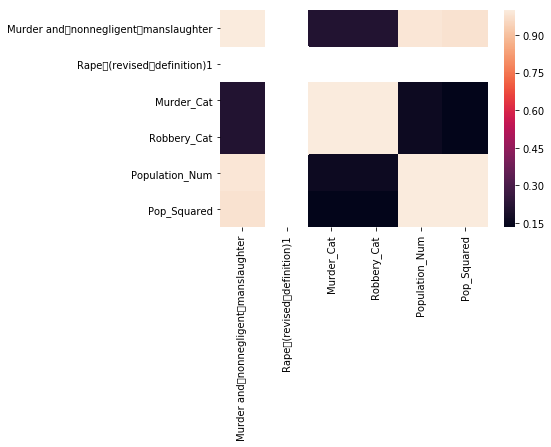

In [119]:
sns.heatmap(mv_finalversion.corr())

# A hypothetical model (from the notes)

In [120]:
# Propertycrime=α+Population+Population2+Murder+Robbery

property_crime = mv_data['Population_Num'] + mv_data['Pop_Squared'] + mv_data['Murder_Cat'] + mv_data['Robbery_Cat']




In [121]:
property_crime

0         3465182.000
1         6643506.000
2         8102562.000
3      9595475894.000
4        40812932.000
5        16724010.000
6         3173742.000
7     13994061914.000
8        90620880.000
9       330603306.000
10        4216862.000
11       20462052.000
12         433622.000
13        6363006.000
14      743680172.000
15       11112222.000
16       55853202.000
17       29360142.000
18      236375250.000
19       32873022.000
20      310728756.000
21     1172617292.000
22     2144106722.000
23        1989510.000
24      144036002.000
25        1045506.000
26        5407950.000
27        4220970.000
28        4266290.000
29        5562522.000
            ...      
321    3805224284.000
322     782908380.000
323      47437658.000
324     780671540.000
325       9075156.000
326      11926662.000
327      33971412.000
328      70434056.000
329      26785800.000
330     794084220.000
331     104970272.000
332       3468906.000
333      18813906.000
334    1916469506.000
335       

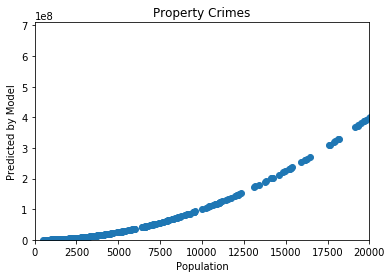

In [122]:
# Sample data.
outcome = property_crime
feature = mv_data['Population_Num']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(feature, outcome)
plt.title('Property Crimes')
plt.axis([0, 20000, 0, 710000000])
plt.xlabel('Population')
plt.ylabel('Predicted by Model')
plt.show()

# Create a feature using a non-linear transformation.
# sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
# plt.scatter(outcome, sqrt_feature)
# plt.title('Transformed values')
# plt.show()

In [123]:
mv_data['Population_Num'].describe()

count       348.000
mean      40037.632
std      450037.368
min         526.000
25%        3003.000
50%        7233.500
75%       18427.500
max     8396126.000
Name: Population_Num, dtype: float64

In [124]:
property_crime.describe()

count              348.000
mean      203554690998.149
std      3778875991964.221
min             277202.000
25%            9021120.000
50%           52332918.000
75%          339771994.500
max     70494940204004.000
dtype: float64